## 机器学习中的helloworld项目

- 导入数据
- 描述数据
- 数据可视化
- 评估算法
- 实施预测

In [2]:
# 导入需要的库
import pandas as pd
# 画散点图矩阵
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 导入数据
filename = 'iris.csv'
names = ['spear-length', 'spear-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names=names)

## 理解数据，选择合适算法
 
主要以下四个角度：
1. 数据维度
2. 数据自身
3. 统计描述所有的数据特征
4. 数据分类的分布情况


In [4]:
# 显示数据维度
dataset.shape

(150, 5)

In [5]:
# 查看数据前十行
dataset.head(10)

,spear-length,spear-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# 统计描述数据信息
dataset.describe()

,spear-length,spear-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# 数据分类分布
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 数据可视化

- 单变量图表更好的理解单个特征属性
- 多变量图表用于理解不同特征属性之间的关系

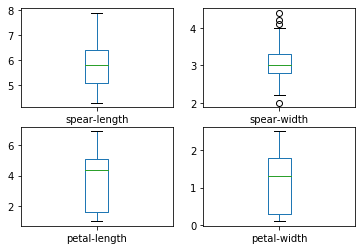

In [20]:
# 单变量图表
# 箱线图
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

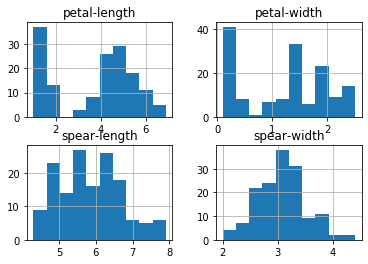

In [9]:
# 直方图
dataset.hist()
plt.show()

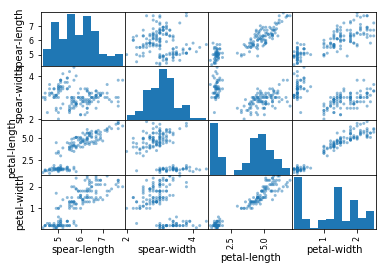

In [10]:
# 多变量图表

# 散点矩阵图
scatter_matrix(dataset)
plt.show()

## 评估算法

通过不同的算法来创建模型，并评估他们的准确度，以便找到最合适的算法
- 分理出评估数据集
- 采用10折交叉验证来评估算法模型
- 生成6个不同的模型来预测新数据
- 选择最优模型

In [36]:
# 分离出评估数据集
array = dataset.values
X = array[:,0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
# sklearn.model_selection.train_test_split(*arrays, test_size=None, 
# train_size=None, random_state=None, shuffle=True, stratify=None)
X_train, X_validation, Y_train, Y_validation = \
train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [38]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((120, 4), (30, 4), (120,), (30,))

In [40]:
# 创建模型
# 算法审查
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

# 评估算法
results = []
for key in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    print('%s: %f(%f)'%(key, cv_results.mean(), cv_results.std()))

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

LR: 0.966667(0.040825)
LDA: 0.975000(0.038188)
KNN: 0.983333(0.033333)
CART: 0.966667(0.040825)
NB: 0.975000(0.053359)
SVM: 0.991667(0.025000)


d:\program files\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


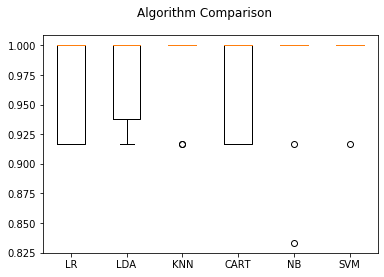

In [41]:
# 箱型图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [42]:
# 使用评估数据集评估算法
svm = SVC()
svm.fit(X=X_train, y=Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
# confusion_matrix混淆矩阵特定的矩阵用来呈现算法性能的可视化效果
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



d:\program files\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
import warnings
warnings.filterwarnings("ignore")#忽略警告